<a href="https://colab.research.google.com/github/Saibot19/7506R-1C2023-GRUPO21/blob/main/7506R_TP1_GRUPO21_CHP3_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importaciones

In [1]:
!pip install 'dtreeviz'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 2.2 MB/s eta 0:00:00


In [12]:
import pandas as pd
import random
import numpy as np
from google.colab import drive
import joblib  
import matplotlib.pyplot as plt
import seaborn as sns

#modelos y métricas
import sklearn as sk
from sklearn import tree
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, make_scorer#, precision_recall_curve, roc_curve,
from sklearn.metrics import confusion_matrix, classification_report
#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text

#Modelado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import xgboost as xgb

import plotly.graph_objects as go
%matplotlib inline

from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold

from sklearn.ensemble import VotingClassifier
from collections import defaultdict


drive.mount('/content/drive', force_remount=True)
df_trabajo = pd.read_csv("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Datasets/hotels_train_filtered.csv")
df_test = pd.read_csv("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Datasets/hotels_test.csv")

df_trabajo

Mounted at /content/drive


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,agent_cancela_seguido,habitacion_correcta,estadia
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,False,True,Reserva con\nambos casos
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,False,True,Reservas entre\nsemana
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,0,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,False,True,Reservas entre\nsemana
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,True,True,Reserva con\nambos casos
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0,True,True,Reserva con\nambos casos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60627,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1,False,False,Reservas entre\nsemana
60628,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0,False,True,Reservas entre\nsemana
60629,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0,False,True,Reserva con\nambos casos
60630,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1,False,True,Reserva con\nambos casos


1. Construir un clasificador KNN optimizar sus hiperparámetros mediante k-fold
Cross Validation
2. Construir un clasificador SVM variando el kernel y los parámetros.
3. Construir un clasificador RF y optimizar sus hiperparámetros mediante k-fold Cross Validation
4. Construir un clasificador XGBoost y optimizar sus hiperparámetros.
5. Construir un ensamble híbrido tipo Voting y otro tipo Stacking.
6. Evaluar la performance de todos los modelos en entrenamiento y validación ,explicar todas las métricas y mostrar la matriz de confusión.
7. Generar predicciones con el set de test y realizar los submits correspondientes en la competencia de Kaggle.

In [3]:
df_trabajo_x = df_trabajo.drop(['is_canceled','id'], axis='columns')
df_trabajo_y = df_trabajo['is_canceled'].copy()

In [4]:
df_trabajo_x = pd.get_dummies(df_trabajo_x, columns=['hotel','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type'], drop_first=True)
#df_trabajo_x_OHE = pd.get_dummies(df_trabajo_x_OHE, columns=['country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type'], drop_first=True)

# Hay un par de variables que no consideramos que sea mejor con OHE como los mese que ya tienen un orden o meal que solo creemos que va agregar ruido
le = LabelEncoder()
# Convertimos nulos a string 'nan', es decir un valor posible mas
for column in df_trabajo_x.columns:
    if df_trabajo_x[column].dtype == 'object':
        df_trabajo_x[column] = le.fit_transform(df_trabajo_x[column])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_trabajo_x, 
                                                    df_trabajo_y, 
                                                    test_size=0.2,    #20% al conjunto de test
                                                    random_state=13,  #para poder reproducir el experimento
                                                    stratify=df_trabajo_y) #estratificado para mantener proporcion

#Verifico Cantidad de Datos en cada set
print('# Datos Entrenamiento: {}'.format(len(x_train)))
print('# Datos Prueba: {}'.format(len(x_test)))

#Verifico como quedaron balanceados
for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train,y_test]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))

# Datos Entrenamiento: 48505
# Datos Prueba: 12127
% Positivos Entrenamiento: 50.215
% Positivos Prueba: 50.219


In [6]:
#Armo una version escalada con minmax (media=0 , var=1  )
min_max_scaler = preprocessing.MinMaxScaler()
x_train_minmax = min_max_scaler.fit_transform(x_train) 
x_test_minmax  = min_max_scaler.transform(x_test) 

In [15]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))
  
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

## KNN

### Ball Tree

In [ ]:
knn_1 = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/knn_ball_tree.joblib")

In [ ]:
#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,40), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree'],
              'metric':[
                        'euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev',
                        'infinity', 'seuclidean', 'mahalanobis', 'wminkowski', 'hamming', 'canberra', 'braycurtis',
                        'matching', 'jaccard', 'dice', 'kulsinski', 'rogerstanimoto', 'russellrao', 'sokalmichener',
                        'sokalsneath', 'haversine', 'pyfunc'
                        ]
             }

##Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
knn_1 = RandomizedSearchCV(knn, params_grid, cv=5, scoring='accuracy', n_iter=30, random_state=5,n_jobs=-1)

knn_1.fit(x_train_minmax, y_train)

In [ ]:
#Mejores hiperparametros
print(knn_1.best_params_)
#Mejor métrica
print(knn_1.best_score_)

{'weights': 'distance', 'n_neighbors': 14, 'metric': 'canberra', 'algorithm': 'ball_tree'}
0.8358519740232966


### KD Tree

In [ ]:
knn_2 = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/knn_kd_tree.joblib")

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,40), 
              'weights':['distance','uniform'],
              'algorithm':['kd_tree'],
              'metric':['euclidean', 'l2', 'minkowski', 'p', 'manhattan', 'cityblock', 'l1', 'chebyshev', 'infinity']
             }

##Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
knn_2 = RandomizedSearchCV(knn, params_grid, cv=5, scoring='accuracy', n_iter=40, random_state=5,n_jobs=-1)

knn_2.fit(x_train_minmax, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'algorithm': ['kd_tree'],
                                        'metric': ['euclidean', 'l2',
                                                   'minkowski', 'p',
                                                   'manhattan', 'cityblock',
                                                   'l1', 'chebyshev',
                                                   'infinity'],
                                        'n_neighbors': range(1, 40),
                                        'weights': ['distance', 'uniform']},
                   random_state=5, scoring='accuracy')

In [ ]:
#Mejores hiperparametros
print(knn_2.best_params_)
#Mejor métrica
print(knn_2.best_score_)

{'weights': 'distance', 'n_neighbors': 19, 'metric': 'manhattan', 'algorithm': 'kd_tree'}
0.8313988248634161


### Brute

In [ ]:
knn_3 = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/knn_brute.joblib")

In [ ]:
#Grilla de Parámetros
params_grid={ 'n_neighbors':range(1,40), 
              'weights':['distance','uniform'],
              'algorithm':['brute'],
              'metric':['cityblock', 'cosine', 'euclidean', 'haversine', 'l2', 'l1', 'manhattan', 'precomputed',
                        'nan_euclidean', 'braycurtis', 'canberra', 'chebyshev', 'correlation', 'cosine', 'dice',
                        'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto',
                        'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'yule', 'wminkowski']
             }

##Clasificador KNN
knn=KNeighborsClassifier()

#Random Search con 10 Folds y 10 iteraciones
knn_3 = RandomizedSearchCV(knn, params_grid, cv=5, scoring='accuracy', n_iter=40, random_state=5,n_jobs=-1)

knn_3.fit(x_train_minmax, y_train)

In [ ]:
#Mejores hiperparametros
print(knn_3.best_params_)
#Mejor métrica
print(knn_3.best_score_)

{'weights': 'distance', 'n_neighbors': 15, 'metric': 'canberra', 'algorithm': 'brute'}
0.8344706731264818


## Random Forest

In [ ]:
def metricas(y_pred,y_test):

  print(classification_report(y_test,y_pred))
  
  cm = confusion_matrix(y_test,y_pred)
  sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')

In [ ]:
rfc_search = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/rfc_final.joblib")

In [ ]:
# Define los parámetros que deseas probar en RandomizedSearchCV
param_grid = {
    'n_estimators': [400, 500, 600, 800],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', None],
}

# Crea una instancia del RandomForestClassifier
rfc = RandomForestClassifier(random_state=404, oob_score=True)

# Crea una instancia de RandomizedSearchCV y especifica el modelo, los parámetros y la métrica de evaluación
rfc_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, scoring='accuracy', n_iter=25, cv=10, n_jobs=-1)

# Ajusta el modelo utilizando RandomizedSearchCV en lugar de fit
rfc_search.fit(x_train, y_train)

In [ ]:
# Mostrar los mejores hiperparámetros encontrados por GridSearchCV
best_params = rfc_search.best_params_
print("Mejores hiperparámetros: ", best_params)

# Mostrar la puntuación media de la validación cruzada para los mejores hiperparámetros
best_score = rfc_search.best_score_
print("Puntuación media de la validación cruzada: ", best_score)

# Calcular la precisión en el conjunto de prueba utilizando los mejores hiperparámetros
accuracy = rfc_search.score(x_test_minmax, y_test)
print("Precisión en el conjunto de prueba: ", accuracy)

Mejores hiperparámetros:  {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'criterion': 'entropy'}
Puntuación media de la validación cruzada:  0.8848983459675654
Precisión en el conjunto de prueba:  0.8852148099282593


              precision    recall  f1-score   support

           0       0.89      0.88      0.88      6037
           1       0.88      0.89      0.89      6090

    accuracy                           0.89     12127
   macro avg       0.89      0.89      0.89     12127
weighted avg       0.89      0.89      0.89     12127



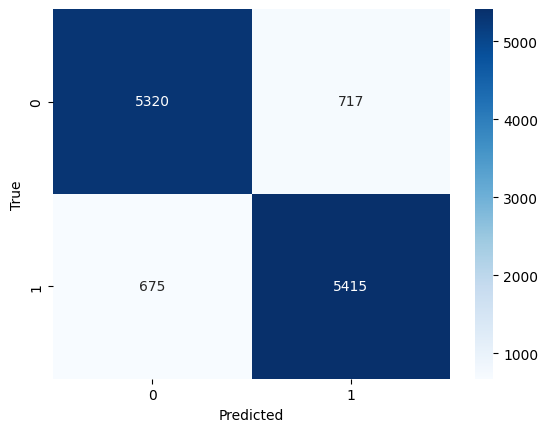

In [ ]:
#Hago la prediccion y calculo las métricas
y_pred_norm=rfc_search.predict(x_test_minmax)
metricas(y_pred_norm,y_test)

## SVM

### Estandarizado

In [ ]:
#Armo una version estandarizada
stand_scaler = preprocessing.StandardScaler()
x_train_norm = stand_scaler.fit_transform(x_train)
x_test_norm=stand_scaler.transform(x_test)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      6037
           1       0.84      0.85      0.85      6090

    accuracy                           0.85     12127
   macro avg       0.85      0.85      0.85     12127
weighted avg       0.85      0.85      0.85     12127



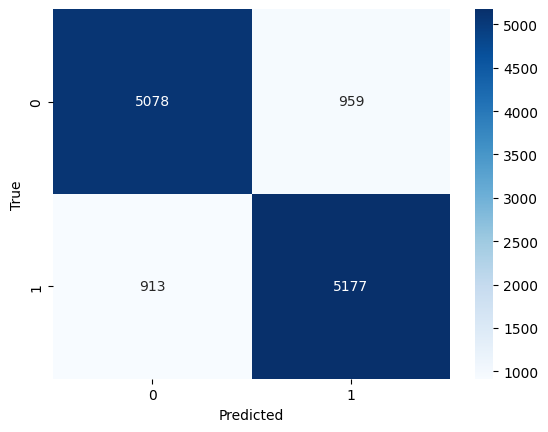

In [ ]:
#Construyo un modelo SVM  
svm_norm= SVC()

#Lo entreno con los datos escalados con normalizacion
svm_norm.fit(x_train_norm, y_train)

#Hago la prediccion y calculo las métricas
y_pred_norm=svm_norm.predict(x_test_norm)
metricas(y_pred_norm,y_test)

### Kernels Lineal

In [ ]:
svm_l = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/svm_kernel_lineal.joblib")

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['linear']}

svm = SVC(kernel='linear')

svm_l = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
svm_l.fit(x_train_minmax, y_train)

{'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
0.8076693124420162
0.8095159561309475
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      6037
           1       0.81      0.81      0.81      6090

    accuracy                           0.81     12127
   macro avg       0.81      0.81      0.81     12127
weighted avg       0.81      0.81      0.81     12127



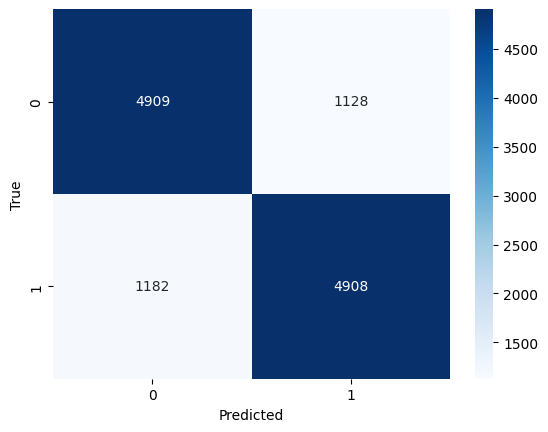

In [ ]:
best_params = svm_l.best_params_
print(best_params)

best_score = svm_l.best_score_
print(best_score)

accuracy = svm_l.score(x_test_minmax, y_test)
print(accuracy)

#Hago la predicción y calculo las métricas
y_pred_pol=svm_l.predict(x_test_minmax)
metricas(y_pred_pol,y_test)

### Kernel Polinomico

In [ ]:
svm_p = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/svm_kernel_poly.joblib")

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'degree': [2, 3, 4],
              'coef0': [0.0, 0.5, 1.0],
              'kernel': ['poly']}

svm = SVC(kernel='poly')

svm_p = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
svm_p.fit(x_train_minmax, y_train)

{'C': 5, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}
0.8423461498814555
0.8451389461532118
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      6037
           1       0.84      0.85      0.85      6090

    accuracy                           0.85     12127
   macro avg       0.85      0.85      0.85     12127
weighted avg       0.85      0.85      0.85     12127



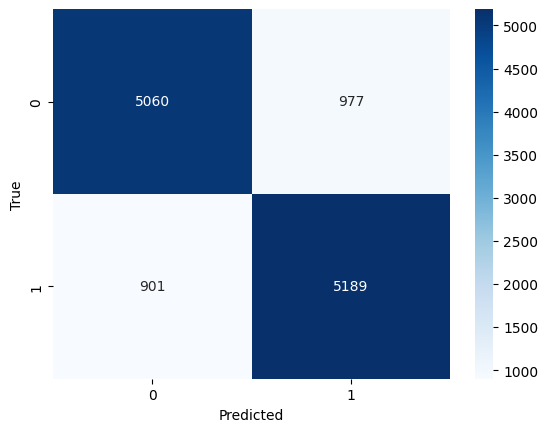

In [ ]:
best_params = svm_p.best_params_
print(best_params)

best_score = svm_p.best_score_
print(best_score)

accuracy = svm_p.score(x_test_minmax, y_test)
print(accuracy)

#Hago la predicción y calculo las métricas
y_pred_pol=svm_p.predict(x_test_minmax)
metricas(y_pred_pol,y_test)

### Kernel Radial

In [ ]:
svm_r = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/svm_kernel_radial.joblib")

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100],
              'kernel': ['rbf']}

svm = SVC(kernel='rbf')

svm_r = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
svm_r.fit(x_train_minmax, y_train)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.8496855994227399
0.8522305599076441
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      6037
           1       0.84      0.87      0.85      6090

    accuracy                           0.85     12127
   macro avg       0.85      0.85      0.85     12127
weighted avg       0.85      0.85      0.85     12127



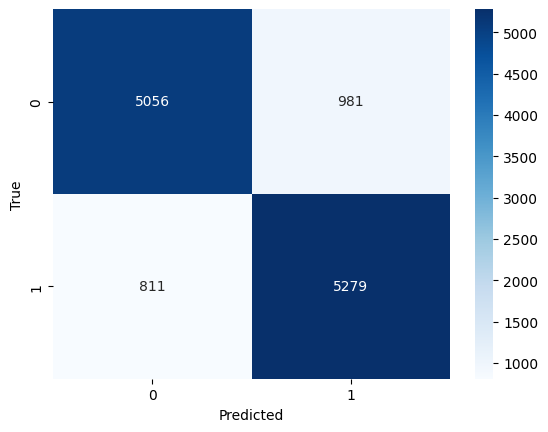

In [ ]:
best_params = svm_r.best_params_
print(best_params)

best_score = svm_r.best_score_
print(best_score)

accuracy = svm_r.score(x_test_minmax, y_test)
print(accuracy)

#Hago la predicción y calculo las métricas
y_pred_pol=svm_r.predict(x_test_minmax)
metricas(y_pred_pol,y_test)

## XGBoost

In [ ]:
xgb_grid = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/XGBoost_4.joblib")

In [ ]:
# Definir los hiperparámetros que se probarán con GridSearchCV
param_grid = {'learning_rate': np.linspace(0.01,0.8,5),#[0.01, 0.1, 0.5],
              'n_estimators': [400,500,600],
              'subsample': [0.3,0.5, 0.8],
              'colsample_bytree': [0.3,0.5, 0.8],
              "max_depth": [9,12,15]
              #'gamma': [0, 1, 5]
              }

# Crear un clasificador XGBoost con los hiperparámetros por defecto
xgb = XGBClassifier()

# Definir la estrategia de validación cruzada para GridSearchCV
cv_strategy = 5

# Crear un objeto GridSearchCV para optimizar los hiperparámetros
xgb_grid = GridSearchCV(estimator=xgb,param_grid=param_grid, cv=cv_strategy, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo en el conjunto de entrenamiento
xgb_grid.fit(x_train, y_train)

In [ ]:
# Mostrar los mejores hiperparámetros encontrados por GridSearchCV
best_params = xgb_grid.best_params_
print("Mejores hiperparámetros: ", best_params)

# Mostrar la puntuación media de la validación cruzada para los mejores hiperparámetros
best_score = xgb_grid.best_score_
print("Puntuación media de la validación cruzada: ", best_score)

# Calcular la precisión en el conjunto de prueba utilizando los mejores hiperparámetros
accuracy = xgb_grid.score(x_test, y_test)
print("Precisión en el conjunto de prueba: ", accuracy)

Mejores hiperparámetros:  {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 600, 'subsample': 0.8}
Puntuación media de la validación cruzada:  0.885022162663643
Precisión en el conjunto de prueba:  0.8851323493032077


A partir de esto corrimos otro gridSearch mas corto pero con los datos normalizados

In [ ]:
xgb_norm = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/XGBoost_final.joblib")

In [ ]:
# Definir los hiperparámetros que se probarán con GridSearchCV
param_grid = {'learning_rate': [0.01, 0.1, 0.2],
              'n_estimators': [600],
              'subsample': [0.5, 0.8,1],
              'colsample_bytree': [0.5, 0.8,1],
              "max_depth": [15,20]
              #'gamma': [0, 1, 5]
              }

# Crear un clasificador XGBoost con los hiperparámetros por defecto
xgb = XGBClassifier()

# Definir la estrategia de validación cruzada para GridSearchCV
cv_strategy = 5

# Crear un objeto GridSearchCV para optimizar los hiperparámetros
xgb_norm = GridSearchCV(estimator=xgb,param_grid=param_grid, cv=cv_strategy, scoring='accuracy', n_jobs=-1)

# Entrenar el modelo en el conjunto de entrenamiento
xgb_norm.fit(x_train_minmax, y_train)

In [ ]:
# Mostrar los mejores hiperparámetros encontrados por GridSearchCV
best_params = xgb_norm.best_params_
print("Mejores hiperparámetros: ", best_params)

# Mostrar la puntuación media de la validación cruzada para los mejores hiperparámetros
best_score = xgb_norm.best_score_
print("Puntuación media de la validación cruzada: ", best_score)

# Calcular la precisión en el conjunto de prueba utilizando los mejores hiperparámetros
accuracy = xgb_norm.score(x_test_minmax, y_test)
print("Precisión en el conjunto de prueba: ", accuracy)

Mejores hiperparámetros:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 600, 'subsample': 0.8}
Puntuación media de la validación cruzada:  0.8858468199154726
Precisión en el conjunto de prueba:  0.8861218768038261


AUC: 0.8588199126731625
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      6037
           1       0.89      0.89      0.89      6090

    accuracy                           0.89     12127
   macro avg       0.89      0.89      0.89     12127
weighted avg       0.89      0.89      0.89     12127



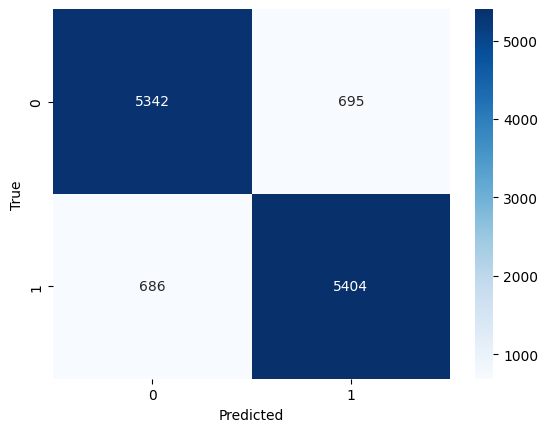

In [ ]:
from sklearn.metrics import roc_auc_score
#Evaluo en el set de test

y_pred_proba= xgb_norm.predict_proba(x_test)[:, 1]
print('AUC:',roc_auc_score(y_test, y_pred_proba))

#Matriz de Confusion
y_pred=xgb_norm.predict(x_test_minmax)

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,y_pred))

## Ensambles Hibridos

### Voting

##### Voting modelos base

In [ ]:
vot_clf = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/vot_base.joblib")

In [ ]:
#Creo clasificadores

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()
xgb_clf = XGBClassifier()

#Creo ensemble de Votación
vot_clf_base = VotingClassifier(estimators = [('lr', log_clf), ('rnd', rnd_clf), ('knn', knn_clf), ('xgb', xgb_clf)], voting = 'hard')

In [ ]:
#Entreno el ensemble
vot_clf_base.fit(x_train, y_train)

#Evaluo en conjunto de test
pred = vot_clf_base.predict(x_test)
accuracy_score(y_test, pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8551991424094995

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      6037
           1       0.90      0.80      0.85      6090

    accuracy                           0.86     12127
   macro avg       0.86      0.86      0.85     12127
weighted avg       0.86      0.86      0.85     12127



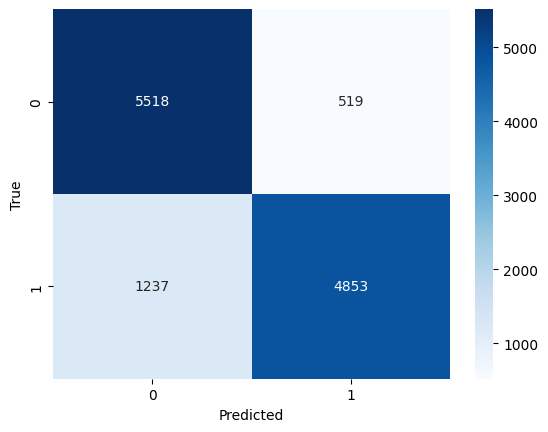

In [ ]:
#Hago la prediccion y calculo las métricas
y_pred_norm=vot_clf.predict(x_test)
metricas(y_pred_norm,y_test)

#### Voting modelos propios

Creamos modelos con los mejores hiperparametros que encontramos en cada clasificador

In [ ]:
voting_propio = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/vot_clf_propio.joblib")

In [ ]:
xgb_norm = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/XGBoost_final.joblib").best_estimator_
knn = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/knn_kd_tree.joblib").best_estimator_
rfc_search = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/rfc_final.joblib").best_estimator_

#Creo ensemble de Votación
vot_clf_propio = VotingClassifier(estimators = [('rf', rfc_search), ('knn', knn), ('xgb', xgb_norm)], voting = 'hard')
#Entreno el ensemble
vot_clf_propio.fit(x_train, y_train)

In [ ]:
pred = voting_propio.predict(x_test)
accuracy_score(y_test, pred)

0.8850498886781561

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      6037
           1       0.88      0.89      0.89      6090

    accuracy                           0.89     12127
   macro avg       0.89      0.89      0.89     12127
weighted avg       0.89      0.89      0.89     12127



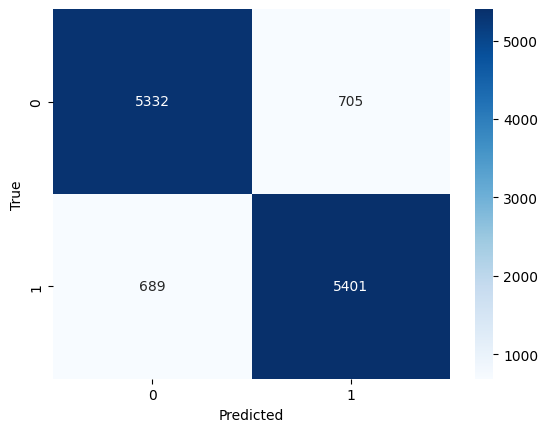

In [ ]:
#Hago la prediccion y calculo las métricas
y_pred_norm=voting_propio.predict(x_test)
metricas(y_pred_norm,y_test)

Agregamos svm para ver si mejora

In [8]:
voting_propio_2= joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/voting_hard.joblib")

In [ ]:
xgb_norm = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/XGBoost_final.joblib").best_estimator_
knn = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/knn_kd_tree.joblib").best_estimator_
rfc_search = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/rfc_final.joblib").best_estimator_
svm_r = SVC(C=100, gamma=0.1, kernel='rbf',probability=True)

#Creo ensemble de Votación
voting_propio_2 = VotingClassifier(estimators = [('rf', rfc_search), ('knn', knn), ('xgb', xgb_norm)], voting = 'hard')
#Entreno el ensemble
voting_propio_2.fit(x_train, y_train)

Accuracy:  0.8835655974272285
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      6037
           1       0.90      0.87      0.88      6090

    accuracy                           0.88     12127
   macro avg       0.88      0.88      0.88     12127
weighted avg       0.88      0.88      0.88     12127



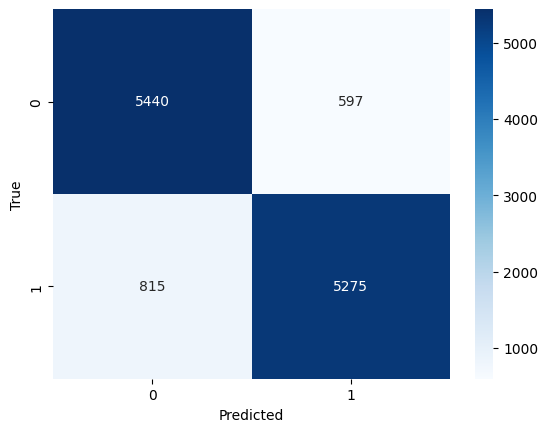

In [17]:
pred = voting_propio_2.predict(x_test_minmax)
print("Accuracy: ",accuracy_score(y_test, pred))
metricas(pred,y_test)

In [13]:
voting_propio_3= joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/voting_soft.joblib")

In [ ]:
xgb_norm = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/XGBoost_final.joblib").best_estimator_
knn = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/knn_kd_tree.joblib").best_estimator_
rfc_search = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/rfc_final.joblib").best_estimator_
svm_r = SVC(C=100, gamma=0.1, kernel='rbf',probability=True)

#Creo ensemble de Votación
voting_propio_3 = VotingClassifier(estimators = [('rf', rfc_search), ('knn', knn), ('xgb', xgb_norm)], voting = 'soft')
#Entreno el ensemble
voting_propio_3.fit(x_train, y_train)

Accuaracy:  0.8849674280531047
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      6037
           1       0.88      0.89      0.89      6090

    accuracy                           0.88     12127
   macro avg       0.88      0.88      0.88     12127
weighted avg       0.88      0.88      0.88     12127



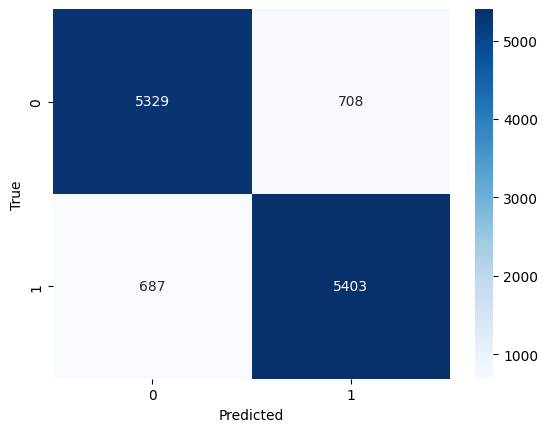

In [16]:
pred = voting_propio_3.predict(x_test_minmax)
print("Accuaracy: ", accuracy_score(y_test, pred))
metricas(pred,y_test)

### Stacking

In [ ]:
#Funcion para evaluar los modelos 5fold -CV (repite 2 veces)
def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, verbose=1, n_jobs=3, error_score='raise')
    return scores

In [ ]:
#Funcion para plotear a performance
def plot_results(model_scores, name):
    
    model_names = list(model_scores.keys())
    results = [model_scores[model] for model in model_names]
    fig = go.Figure()
    for model, result in zip(model_names, results):
        fig.add_trace(go.Box(
            y=result,
            name=model,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            marker_size=2,
            line_width=1)
        )
    
    fig.update_layout(
    title='Performance of Different Models Using 5-Fold Cross-Validation',
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    showlegend=False)
    fig.show()

#### Stacking modelos base

In [ ]:
stacking_model = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/stacking_base.joblib")

In [ ]:
#Modelos Base
base_models = {'random_forest':RandomForestClassifier(n_estimators=50),
               'xgb': XGBClassifier(),
               'knn': KNeighborsClassifier(n_neighbors=11)}

#Guarda los scores de cada modelo
model_scores = defaultdict()

#Entreno los clasificadores
for name, model in base_models.items():
    print('Evaluating {}'.format(name))
    scores = evaluate_model(model, x_train_minmax, y_train)
    model_scores[name] = scores

Evaluating random_forest


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   20.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Evaluating xgb


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:  1.5min finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Evaluating knn


[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:   29.2s finished


In [ ]:
from sklearn.ensemble import StackingClassifier

#Modelos Base
base_models = [('random_forest', RandomForestClassifier(n_estimators=50)),
               ('xgb', XGBClassifier()),
               ('knn', KNeighborsClassifier(n_neighbors=11))]

#Meta Modelo
meta_model = LogisticRegressionCV()

#Ensemble Stacking
stacking_model = StackingClassifier(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

In [ ]:
#Performance el modelo en entrenamiento
stacking_scores = evaluate_model(stacking_model, x_train_minmax, y_train)
model_scores['stacking'] = stacking_scores

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed: 12.8min finished


In [ ]:
plot_results(model_scores, name='stacking_model_cv')

In [ ]:
#Evaluo en conjunto de test
#stacking_model.fit(x_train,y_train).score(x_test,y_test)
stacking_model.fit(x_train_minmax,y_train)
y_pred_st = stacking_model.predict(x_test_minmax)
accuracy_score(y_test, y_pred_st)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   45.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.9s finished
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prep

0.8837305186773315

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6037
           1       0.88      0.88      0.88      6090

    accuracy                           0.88     12127
   macro avg       0.88      0.88      0.88     12127
weighted avg       0.88      0.88      0.88     12127



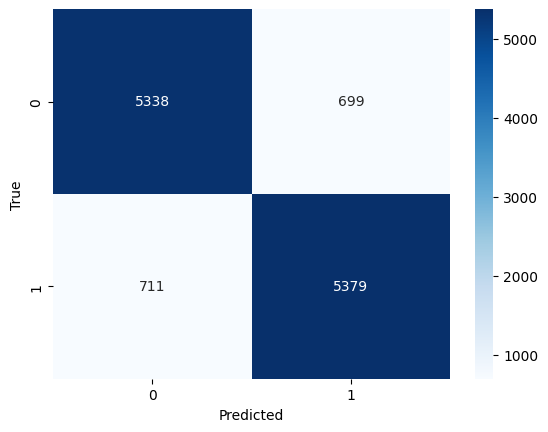

In [ ]:
#Hago la prediccion y calculo las métricas
y_pred_norm=stacking_model.predict(x_test_minmax)
metricas(y_pred_norm,y_test)

In [ ]:
joblib.dump(stacking_model, "/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/stacking_base.joblib")

['/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/stacking_base.joblib']

#### Stacking modelos propios

In [ ]:
stacking_propio = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/stacking_propio.joblib")

In [ ]:
xgb_norm = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/XGBoost_final.joblib").best_estimator_
knn = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/knn_kd_tree.joblib").best_estimator_
rfc_search = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/rfc_final.joblib").best_estimator_

In [ ]:
model_scores = defaultdict()
model_scores["xgb_norm"] = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/XGBoost_final.joblib").cv_results_['mean_test_score']
model_scores["knn_1"] = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/knn_ball_tree.joblib").cv_results_['mean_test_score']
model_scores["knn_2"] = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/knn_kd_tree.joblib").cv_results_['mean_test_score']
model_scores["knn_3"] = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/knn_brute.joblib").cv_results_['mean_test_score']
model_scores["rfc_search"] = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/rfc_final.joblib").cv_results_['mean_test_score']
model_scores["svm_l"] = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/svm_kernel_lineal.joblib").cv_results_['mean_test_score']
model_scores["svm_p"] = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/svm_kernel_poly.joblib").cv_results_['mean_test_score']
model_scores["svm_r"] = joblib.load("/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Modelos/svm_kernel_radial.joblib").cv_results_['mean_test_score']
print(model_scores["svm_r"])

[0.81521493 0.81088548 0.66498299 0.64413978 0.83253273 0.84545923
 0.79140295 0.74798474 0.84500567 0.84170704 0.79923719 0.75120091
 0.8496856  0.83242965 0.79911349 0.75124214]


In [ ]:
#Grafico performance
plot_results(model_scores, name='stacking_model_cv')

In [ ]:
from sklearn.ensemble import StackingClassifier

#Modelos Base
base_models = [('random_forest', rfc_search),
               ('xgb', xgb_norm),
               ('knn', knn)]

#Meta Modelo
meta_model = LogisticRegressionCV()

#Ensemble Stacking
stacking_model = StackingClassifier(estimators=base_models, 
                                    final_estimator=meta_model, 
                                    passthrough=True, 
                                    cv=5,
                                    verbose=2)

In [ ]:
#Performance el modelo en entrenamiento
stacking_scores = evaluate_model(stacking_model, x_train_minmax, y_train)
model_scores['stacking'] = stacking_scores

In [ ]:
#Grafico performance
plot_results(model_scores, name='stacking_model_cv')

In [ ]:
#Evaluo en conjunto de test
#stacking_model.fit(x_train,y_train).score(x_test,y_test)
stacking_model.fit(x_train_minmax,y_train)


In [ ]:
y_pred_st = stacking_model.predict(x_test_minmax)
accuracy_score(y_test, y_pred_st)

0.8837305186773315

In [ ]:
#Hago la prediccion y calculo las métricas
y_pred_norm=stacking_propio.predict(x_test_minmax)
metricas(y_pred_norm,y_test)

## Submit

In [ ]:
#AGent
pivot_table = pd.pivot_table(df_trabajo, index="agent", columns="is_canceled", values="id", aggfunc="count", fill_value=0) 
pivot_table.columns = ["No Cancelado", "Cancelado"]
pivot_table["Total"] = pivot_table["No Cancelado"] + pivot_table["Cancelado"]
pivot_table["Porcentaje de Cancelados"] = np.rint(pivot_table["Cancelado"]/pivot_table["Total"]*100)

agents = pivot_table[(pivot_table["Porcentaje de Cancelados"] > 65) & (pivot_table["Total"] > 100)].index.to_list()

df_test["agent_cancela_seguido"] = df_test["agent"].isin(agents)

#Habitacion correcta
df_test['habitacion_correcta'] = (df_test['reserved_room_type'] == df_test['assigned_room_type'])

#Estadia
stay_mapping = {
    0: "Reservas sin\nnoches",
    1: "Reservas entre\nsemana",
    2: "Reservas en fin\nde semana",
    3: "Reserva con\nambos casos"
}

df_test['estadia'] = (
    df_test['stays_in_weekend_nights'].apply(lambda x: 2 if x > 0 else 0) + 
    df_test['stays_in_week_nights'].apply(lambda x: 1 if x > 0 else 0)
)


df_test['estadia'] = df_test['estadia'].map(stay_mapping)

df_test['country'].fillna("Otros")

df_test.loc[df_test["assigned_room_type"].isin(["B", "C", "H","I","K","P","L"]), "assigned_room_type"] = "Otros"
df_test.loc[df_test["reserved_room_type"].isin(["B", "C", "H","I","K","P","L"]), "reserved_room_type"] = "Otros"

lista_paises = df_trabajo["country"].value_counts().index.to_list()
lista_paises.remove("Otros")

df_test.loc[~df_test["country"].isin(lista_paises), "country"] = "Otros"




In [ ]:
X_submission = pd.get_dummies(df_test, columns=['hotel','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type'], drop_first=True)

from sklearn.preprocessing import (
    LabelEncoder
)

le = LabelEncoder()
# Convertimos nulos a string 'nan', es decir un valor posible mas
for column in X_submission.columns:
    if X_submission[column].dtype == 'object':
        X_submission[column] = le.fit_transform(X_submission[column])

In [ ]:
X_submission.drop(['id','company','reservation_status_date'], axis='columns',inplace=True)
X_submission.fillna(0, inplace=True)

X_submission_minmax = min_max_scaler.transform(X_submission) 


In [ ]:
y_pred = stacking_propio.predict(X_submission_minmax)
y_pred

In [ ]:
df_submission = pd.DataFrame({'id': df_test['id'], 'is_canceled': y_pred})
df_submission.head()

,id,is_canceled
0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e,1
1,aba9aac2-4495-4645-a60e-90328713c999,1
2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad,0
3,ce1b400e-afa1-4946-bdff-004b859eb61c,1
4,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214,1


In [ ]:
df_submission.to_csv('/content/drive/My Drive/OrgaDeDatosRodriguez/TP_1/Submission/chp3_xgb_3.csv', index=False)